# Malara Diagnosis

## Dataset

**Description:**

The Malaria dataset contains a total of 27,558 cell images with equal instances of parasitized and uninfected cells from the thin blood smear slide images of segmented cells.

**Additional Documentation:** [Explore on Papers With Code](https://paperswithcode.com/dataset/malaria-dataset)

**Homepage:** https://lhncbc.nlm.nih.gov/publication/pub9932

**Source code:** `tfds.datasets.malaria.Builder`

**Versions:**

* `1.0.0` (default): No release notes.

**Download size:** 337.08 MiB

**Dataset size:** 317.62 MiB

**Auto-cached** [documentation](https://www.tensorflow.org/datasets/performances#auto-caching): No

**Splits:**

| Split	| Examples |
| :---- | :------- |
| 'train'	| 27,558 |

**Feature structure:**


```python
FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})
```

**Feature documentation**

| Feature | Class | Shape | Dytpe |
| :---- | :---- | :---- | :---- |
| image | Image | (None, None, 3) | uint8 |
| label | ClassLabel | | int64 |

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [13]:
# Retrieve dataset from tensorflow_datasets
dataset, dataset_info = tfds.load("malaria", with_info=True, as_supervised=True, shuffle_files=True)

In [47]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

In [19]:
# Create train/test splits
def splits(dataset, train_ratio, val_ratio, test_ratio):
  DATASET_SIZE = len(dataset)

  train_dataset = dataset.take(int(train_ratio * DATASET_SIZE))
  val_dataset = dataset.skip(int(train_ratio * DATASET_SIZE)).take(int(val_ratio * DATASET_SIZE))
  test_dataset = dataset.skip(int(train_ratio * DATASET_SIZE)).skip(int(test_ratio * DATASET_SIZE))

  return train_dataset, val_dataset, test_dataset

In [20]:
train_dataset, val_dataset, test_dataset = splits(dataset["train"], 0.6, 0.2, 0.2)

print(f"Train set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Train set size: 16534
Validation set size: 5511
Test set size: 5513


# Data Visualization

label: 0 parasitized
label: 1 uninfected


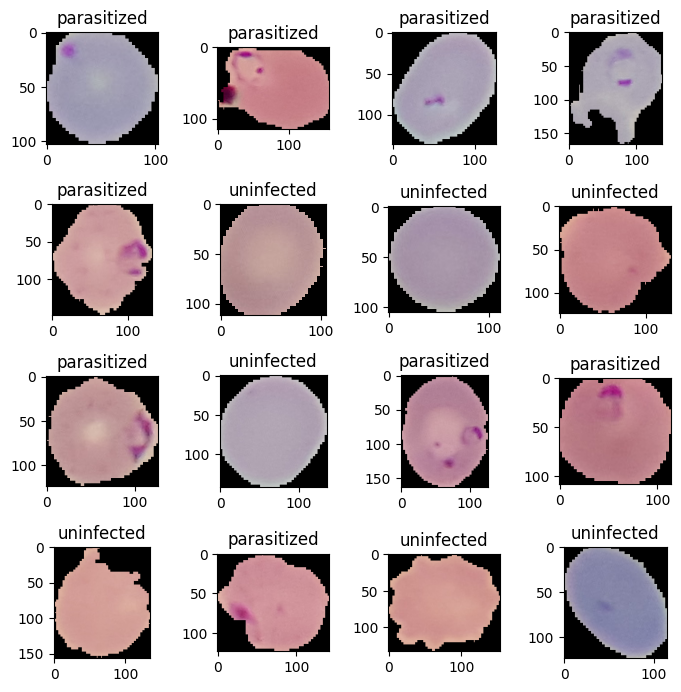

In [39]:
for idx, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, idx + 1)
  ax.figure.set_size_inches(7, 7)
  ax.figure.tight_layout(pad=1.0)
  plt.imshow(image)
  plt.title(dataset_info.features["label"].int2str(label))

print("label: 0", dataset_info.features["label"].int2str(0))
print("label: 1", dataset_info.features["label"].int2str(1))

# Data Processing

In [44]:
def rescale_image(image, label, size=(224, 224)):
  return tf.image.resize(image, size) / 255.0 , label

In [45]:
train_dataset = train_dataset.map(rescale_image)

stopped at 7:09:02